# Semaine 11 - Réseau de neurones de base

Cette semaine nous allons écrire un réseau de neurones de base, que nous allons entraîner afin qu'il inverse des séquences de bits. Si vous réussissez à l'implémenter, vous pourrez ensuite vous amuser à l'utiliser sur d'autres types de données

## Importations et initialisations de variables

Nous n'allons utiliser que numpy pour cet exercice

In [1]:
import numpy as np

Nous avons un réseau à deux couches (l'input ne comptant pas pour une couche). Nous allons utiliser 300 séquences de bits pour l'entraînement.

In [121]:
# Nb de neurones sur chaque couche
n_in = 10
n_hidden = 100
n_out = 10

# Nb de 'training examples'
m = 300

In [132]:
alpha = 0.1  # Learning rate
epochs = 500  # nb iterations du gradient descent

## Définition des fonctions d'activation

Nous utiliserons la fonction tanh pour l'activation de la "hidden layer", et la sigmoïde pour la dernière couche. Implémentez-les si elle n'existent pas déjà dans numpy. Implémentez aussi la dérivée de l'une ou l'autre d'entre elles, le cas échéant.
Attention! Les fonctions doivent pouvoir traiter des vecteurs ou des matrices en effectuant l'opération sur chaque élément de ces derniers.

In [133]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [134]:
# Dérivée de tanh
def tanh_prime(x):
    return 1 - np.tanh(x)

## Entraînement du réseau de neurones

Nous allons écrire une fonction qui fait une activation puis une rétropropagation, puis renvoie l'erreur (loss) et le gradient (toutes ces variables qui commencent par d...). L'itération sur les 200 epochs se fera dans un deuxième temps.

In [135]:
def train(X, Y, W1, W2, b1, b2):
    loss_history = []
    
    for epoch in range(epochs):
        # Forward
        Z1 = np.add(np.dot(W1, X), b1)
        A1 = np.tanh(Z1)
        Z2 = np.add(np.dot(W2, A1), b2)
        A2 = sigmoid(Z2)
        
        # Backward
        dZ2 = A2 - Y
        dW2 = (1 / X.shape[1]) * np.dot(dZ2, A1.T)
        db2 = (1 / X.shape[1]) * np.sum(dZ2, axis = 1, keepdims=True)
        
        dZ1 = np.multiply(np.dot(W2.T, dZ2), tanh_prime(Z1))
        dW1 = (1 / X.shape[1]) * np.dot(dZ1, X.T)
        db1 = (1 / X.shape[1]) * np.sum(dZ1, axis = 1, keepdims=True)    

        # Parameter update (use the learning rate alpha here!)
        W1 -= alpha * dW1
        W2 -= alpha * dW2
        b1 -= alpha * db1
        b2 -= alpha * db2
       
    
        # Compute loss
        loss = np.mean(
            -np.add(np.multiply(Y,np.log(A2)),
            np.multiply(np.subtract(1, Y),np.log(np.subtract(1, A2)))))
        
        
        loss_history.append(loss)
        print("Epoch %d, Loss: %.8f" % (epoch, loss))
    
    return loss_history, W1, W2, b1, b2

### Initialisation des paramètres du réseau

Attention, certains paramètres sont initalisés à zéro, d'autres non...

In [136]:
W1 = np.random.randn(n_hidden, n_in) * 1
W2 = np.random.randn(n_out, n_hidden) * 1
b1 = np.zeros((n_hidden, 1))
b2 = np.zeros((n_out, 1))

## Génération des données d'entraînement

Ici il s'agit créer 300 séries de 10 chiffres binaires (1 et 0) pour les X.
Les Y seront ces mêmes séries, inversées.

In [137]:
# Data generation
X = np.random.binomial(1, 0.5, (n_in, m))
print(X.shape[1])
Y = X ^ 1

300


## Lancer l'entraînement du réseau

In [138]:
loss_history, W1, W2, b1, b2 = train(X, Y, W1, W2, b1, b2)

Epoch 0, Loss: 3.30605637
Epoch 1, Loss: 2.40134993
Epoch 2, Loss: 1.81490883
Epoch 3, Loss: 1.44235143
Epoch 4, Loss: 1.12633563
Epoch 5, Loss: 0.93651439
Epoch 6, Loss: 0.76517558
Epoch 7, Loss: 0.67129419
Epoch 8, Loss: 0.55192318
Epoch 9, Loss: 0.48520807
Epoch 10, Loss: 0.40774756
Epoch 11, Loss: 0.35832723
Epoch 12, Loss: 0.31792595
Epoch 13, Loss: 0.28680075
Epoch 14, Loss: 0.26361497
Epoch 15, Loss: 0.24354392
Epoch 16, Loss: 0.22743355
Epoch 17, Loss: 0.21322118
Epoch 18, Loss: 0.20108172
Epoch 19, Loss: 0.19034529
Epoch 20, Loss: 0.18087864
Epoch 21, Loss: 0.17242179
Epoch 22, Loss: 0.16482784
Epoch 23, Loss: 0.15795932
Epoch 24, Loss: 0.15171171
Epoch 25, Loss: 0.14599816
Epoch 26, Loss: 0.14074769
Epoch 27, Loss: 0.13590125
Epoch 28, Loss: 0.13140941
Epoch 29, Loss: 0.12723057
Epoch 30, Loss: 0.12332947
Epoch 31, Loss: 0.11967620
Epoch 32, Loss: 0.11624527
Epoch 33, Loss: 0.11301486
Epoch 34, Loss: 0.10996629
Epoch 35, Loss: 0.10708344
Epoch 36, Loss: 0.10435236
Epoch 37, L

Epoch 307, Loss: 0.01470599
Epoch 308, Loss: 0.01467637
Epoch 309, Loss: 0.01464696
Epoch 310, Loss: 0.01461777
Epoch 311, Loss: 0.01458879
Epoch 312, Loss: 0.01456001
Epoch 313, Loss: 0.01453145
Epoch 314, Loss: 0.01450308
Epoch 315, Loss: 0.01447491
Epoch 316, Loss: 0.01444693
Epoch 317, Loss: 0.01441915
Epoch 318, Loss: 0.01439155
Epoch 319, Loss: 0.01436414
Epoch 320, Loss: 0.01433691
Epoch 321, Loss: 0.01430987
Epoch 322, Loss: 0.01428300
Epoch 323, Loss: 0.01425630
Epoch 324, Loss: 0.01422978
Epoch 325, Loss: 0.01420343
Epoch 326, Loss: 0.01417724
Epoch 327, Loss: 0.01415122
Epoch 328, Loss: 0.01412536
Epoch 329, Loss: 0.01409967
Epoch 330, Loss: 0.01407412
Epoch 331, Loss: 0.01404874
Epoch 332, Loss: 0.01402351
Epoch 333, Loss: 0.01399843
Epoch 334, Loss: 0.01397350
Epoch 335, Loss: 0.01394871
Epoch 336, Loss: 0.01392407
Epoch 337, Loss: 0.01389958
Epoch 338, Loss: 0.01387523
Epoch 339, Loss: 0.01385101
Epoch 340, Loss: 0.01382694
Epoch 341, Loss: 0.01380300
Epoch 342, Loss: 0.0

### Visualiser la décroissance de l'erreur sur un graphe (optionnel)

0.011033283577594113

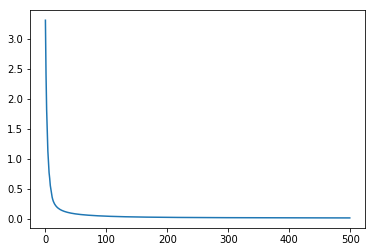

In [139]:
%matplotlib inline  
from matplotlib import pyplot as plt

plt.plot(loss_history)
loss_history[-1]

## Évaluation du réseau de neurones

Écrivez une petite fonction qui, à partir des activation de la dernière couche du réseau, produit un vecteur de 1 et de 0. Normalement il suffit de copier-coller quelque lignes de code et d'ajouter quelque chose à la fin. Attention, ici, contrairement à ce qu'on avait dans le MOOC, la dernière couche a 10 valeurs de sortie, et non pas une seule.

In [140]:
def predict(X, W1, W2, b1, b2):
        Z1 = np.add(np.dot(W1, X), b1)
        A1 = np.tanh(Z1)
        Z2 = np.add(np.dot(W2, A1), b2)
        A2 = sigmoid(Z2)
        return (np.array([0 if res < 0.5 else 1 for res in A2]))
    
# ret = predict(X, W1, W2, b1, b2)
# print()

# ret
    


### Tester la performance sur un seul exemple
Ici on génère un seul exemple (une série de 10 chiffres binaires), puis on fait prédire son inversion.

In [131]:
X = np.random.binomial(1, 0.5, (n_in,1))
print(X.T)
print(predict(X, W1, W2, b1, b2).T)

[[0 1 0 0 1 0 0 1 1 1]]
[1 0 1 1 0 1 1 0 0 0]


### Tester la performance sur une série d'exemples